In [85]:
#1. Load the Dataset:

import pandas as pd

# Read the CSV file
gdp_df = pd.read_csv("/Users/ilaydadenizikendiz/Spring 2024/Assignment 2/gdp_pcap.csv")
life_expectancy_df = pd.read_csv("/Users/ilaydadenizikendiz/Spring 2024/Assignment 2/life expectancy.csv")
population_df = pd.read_csv("/Users/ilaydadenizikendiz/Spring 2024/Assignment 2/population.csv")

#print(gdp_df.head())
#print(population_df.head())
#print(life_expectancy_df.head())

In [145]:
# 2. Data Merging:

# Convert from wide to long

melted_gdp = pd.melt(gdp_df, id_vars=['country'], var_name='year', value_name='GDP')

melted_life = pd.melt(life_expectancy_df, id_vars=['country'], var_name='year', value_name='Life Expectancy')

melted_population = pd.melt(population_df, id_vars=['country'], var_name='year', value_name='Population')

# Merge GDP and life expectancy data
merged_df = pd.merge(melted_gdp, melted_life, on=['country', 'year'])

# Merge the merged dataframe with population data
merged_df = pd.merge(merged_df, melted_population, on=['country', 'year'])




In [110]:
#3. Data Cleaning and Preparation:

missing_values = merged_df.isnull().sum()
merged_df = merged_df.interpolate()

In [88]:
 #test case
 #andorra_data = merged_df[merged_df['country'] == 'Andorra']
 #print(andorra_data)

In [89]:
# 4. Data Exploration:
print(merged_df.head(), '\n')

print(merged_df.tail(), '\n')

unique_countries = merged_df['country'].nunique()
print("Number of unique countries:", unique_countries, '\n')

# data for year 2000
data_x = merged_df[merged_df['year'] == '2000']
print(data_x)

       country  year   GDP  Life Expectancy Population
0  Afghanistan  1800   599            28.20      3.28M
1       Angola  1800   465            27.00      1.57M
2      Albania  1800   585            35.40       400k
3      Andorra  1800  1710            33.05       2650
4          UAE  1800  1420            30.70      40.2k 

            country  year    GDP  Life Expectancy Population
58690         Samoa  2100  29.2k             80.8       441k
58691         Yemen  2100   8000             78.0      74.2M
58692  South Africa  2100  50.2k             77.7      74.6M
58693        Zambia  2100  19.6k             77.1      63.6M
58694      Zimbabwe  2100  11.9k             74.4      35.6M 

Number of unique countries: 195 

            country  year    GDP  Life Expectancy Population
39000   Afghanistan  2000    794             54.7      19.5M
39001        Angola  2000   4400             52.8      16.4M
39002       Albania  2000   6020             75.4      3.18M
39003       Andorra  2

In [132]:
#5. Data Filtering:
data_Nepal = merged_df[merged_df['country'] == 'Nepal']
print(data_Nepal, '\n')
# convertion method for string values
def convert_population(str): 

    pattern = r'(\d*\.?\d+)([kKmMbB]?)' # 3k, 3m, 3b, 3K, 3M, 3B
    match = re.match(pattern, str) 
    if match:
        number = float(match.group(1))
        multiplier = match.group(2).lower()
        if multiplier == 'k':
            number *= 1000
        elif multiplier == 'm':
            number *= 1000000
        elif multiplier == 'b':
            number *= 1000000000
            
        return number
    else:
        return None 
    
copy = merged_df.copy() # copy of the data

copy['Population'] = copy['Population'].apply(convert_population) # change the population values with the method output

# Filter out countries with a population less than 1 million
filtered_df = copy[copy['Population'] <= 1000000]

print(filtered_df)

      country  year    GDP  Life Expectancy Population
130     Nepal  1800    914             32.8         4M
325     Nepal  1801    914             32.8      3.99M
520     Nepal  1802    914             32.8      3.99M
715     Nepal  1803    914             32.8      3.98M
910     Nepal  1804    914             32.8      3.98M
...       ...   ...    ...              ...        ...
57850   Nepal  2096  22.9k             83.8      34.6M
58045   Nepal  2097  23.4k             84.0      34.4M
58240   Nepal  2098  23.8k             84.1      34.2M
58435   Nepal  2099  24.3k             84.2        34M
58630   Nepal  2100  24.8k             84.3      33.8M

[301 rows x 5 columns] 

                              country  year    GDP  Life Expectancy  \
2                             Albania  1800    585             35.4   
3                             Andorra  1800   1710              NaN   
4                                 UAE  1800   1420             30.7   
5                           Ar

In [139]:
# 6. Data Organization:
# sort according to Life Expectancy
sorted_life = merged_df.sort_values(by='Life Expectancy')


filtered_df = filtered_df.copy() # copy of the data

# 0-1000000 : Low
# 1000000 - 1000000000 : Medium
# 1000000000 - inf : High
thresholds = [0, 1000000, 1000000000, float('inf')]  

# Define labels for the categories
labels = ['Low', 'Medium', 'High']

# Create a new column 'Population Category' based on population thresholds
filtered_df['Population Category'] = pd.cut(filtered_df['Population'], bins=thresholds, labels=labels, right=False)

print(filtered_df)


                              country  year    GDP  Life Expectancy  \
2                             Albania  1800    585             35.4   
3                             Andorra  1800   1710              NaN   
4                                 UAE  1800   1420             30.7   
5                           Argentina  1800   2120             33.2   
6                             Armenia  1800    733             34.0   
...                               ...   ...    ...              ...   
58666                      Seychelles  2100  73.6k             84.8   
58674                           Tonga  2100  32.3k             82.7   
58678                          Tuvalu  2100  26.5k              NaN   
58686  St. Vincent and the Grenadines  2100  57.4k             83.5   
58690                           Samoa  2100  29.2k             80.8   

       Population Population Category  
2        400000.0                 Low  
3          2650.0                 Low  
4         40200.0          

In [147]:
# 7. Basic Data Analysis:
# convert to numeric values
merged_df['GDP'] = pd.to_numeric(merged_df['GDP'], errors='coerce')

# select all gdp data for each country and give their mean value 
average_gdp_per_capita = merged_df.groupby('country')['GDP'].mean()
print(average_gdp_per_capita)




country
Afghanistan    1577.119601
Albania        1980.421053
Algeria        3062.059113
Andorra        4030.466667
Angola         2764.285714
                  ...     
Venezuela      3510.963855
Vietnam        1888.082192
Yemen          2475.116279
Zambia         2219.992647
Zimbabwe       2424.232082
Name: GDP, Length: 195, dtype: float64


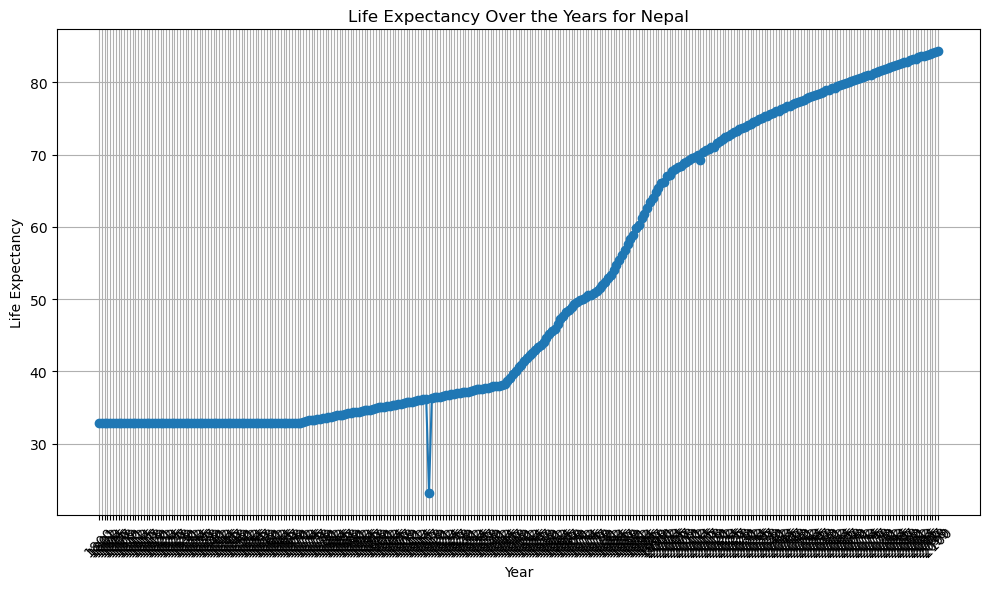

In [149]:
#8. Data Visualization:
# Use basic plotting functions in Pandas (e.g., plot, bar) to visualize the trends in life
# expectancy over the years for a selected country.

import matplotlib.pyplot as plt

selected_country = 'Nepal'
country_data = merged_df[merged_df['country'] == selected_country] # selected country data

plt.figure(figsize=(10, 6))
plt.plot(country_data['year'], country_data['Life Expectancy'], marker='o', linestyle='-') # life expectancy line for selected country
plt.title('Life Expectancy Over the Years for {}'.format(selected_country))
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()